In [ ]:
# Package imports req
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from sklearn.model_selection import train_test_split
np.random.seed(1)

In [ ]:
def sigmoid(Z):

    #Implements the sigmoid activation in numpy

    #Arguments:
    #Z -- numpy array of any shape

    #Returns:
    #A -- output of sigmoid(z), same shape as Z
    #cache -- returns Z as well, useful during backpropagation

    A = 1/(1+np.exp(-Z))
    cache = Z

    return A, cache

def tanh(Z):
    """
    Implement the tanh activation function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """

    A = np.tanh(Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A, cache

def tanh_backward(dA, cache):
    """
    Implement the backward propagation for a single Tanh unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache
    # Compute the derivative of tanh
    dZ = 1 - np.tanh(Z)**2

    dZ = dZ * dA

    assert (dZ.shape == Z.shape)

    return dZ

def relu(Z):

    #Implement the RELU function.

    #Arguments:
    #Z -- Output of the linear layer, of any shape

    #Returns:
    #A -- Post-activation parameter, of the same shape as Z
    #cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently


    A = np.maximum(0,Z)

    assert(A.shape == Z.shape)

    cache = Z
    return A, cache


def relu_backward(dA, cache):

    #Implement the backward propagation for a single RELU unit.

    #Arguments:
    #dA -- post-activation gradient, of any shape
    #cache -- 'Z' where we store for computing backward propagation efficiently

    #Returns:
    #dZ -- Gradient of the cost with respect to Z


    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.

    # When z <= 0, you should set dz to 0 as well.
    dZ[Z <= 0] = 0

    assert (dZ.shape == Z.shape)

    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """

    Z = cache

    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)

    assert (dZ.shape == Z.shape)

    return dZ


In [ ]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer

    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """

    np.random.seed(1)

    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))

    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters


def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network

    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))

        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))


    return parameters

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """

    Z = W.dot(A) + b

    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)

    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """

    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)

    elif activation == "tanh":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = tanh(Z)

    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation

    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()

    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network

    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "tanh")
        caches.append(cache)

    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)

    assert(AL.shape == (1,X.shape[1]))

    return AL, caches

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """

    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))

    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())

    return cost

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)

    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.

    Arguments:
    dA -- post-activation gradient for current layer l
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache

    if activation == "tanh":
        dZ = tanh_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)

    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group

    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)

    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ...
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ...
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL

    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")

    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "tanh")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent

    Arguments:
    parameters -- python dictionary containing your parameters
    grads -- python dictionary containing your gradients, output of L_model_backward

    Returns:
    parameters -- python dictionary containing your updated parameters
                  parameters["W" + str(l)] = ...
                  parameters["b" + str(l)] = ...
    """

    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]

    return parameters

def predict(X, y, parameters):
    """
    This function is used to predict the results of a  L-layer neural network.

    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model

    Returns:
    p -- predictions for the given dataset X
    """

    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))

    # Forward propagation
    probas, caches = L_model_forward(X, parameters)


    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        p[0,i] = probas[0,i]


    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    accuracy=(100 - np.mean(np.abs(p - y)) * 100)

    # Calculate the mean squared error (MSE)
    #mse = np.mean((y - p)**2)

    # Calculate the accuracy
    #accuracy = 1 - mse/np.var(y)



    print("Accuracy: "  + str(accuracy))

    return p

def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]

        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


In [ ]:
# Handle the missing data
input_data = pd.read_csv('malmo_data_final.csv', thousands=',')

rows_to_access = [3427, 5584, 5585, 5586, 5587, 7623, 7624] # to verify the fill
column_to_impute = 'solar radiation [W/m2]'

temp_df = pd.DataFrame()
temp_df['ffill'] = input_data[column_to_impute].fillna(method='ffill')
temp_df['bfill'] = input_data[column_to_impute].fillna(method='bfill')
temp_df['meanfill'] = temp_df.mean(axis=1)
temp_df['solar_radiation_NaN_filled'] = input_data[column_to_impute].fillna(temp_df.pop('meanfill'))
temp_df['solar_radiation_filled_rolled'] = temp_df['solar_radiation_NaN_filled'].rolling(7, center=True, min_periods=1).mean() # sliding window
temp_df['imputed_solar_radiation'] = input_data[column_to_impute].fillna(temp_df.pop('solar_radiation_filled_rolled'))

values_to_access = temp_df.loc[rows_to_access] # to verify the fill

input_data[column_to_impute] = temp_df['imputed_solar_radiation']
df_filled = input_data

# Solution before we have filled the missing data
# input_data.dropna(inplace=True) # comment this line when the missing data is filled

df_filled['day'] = (df_filled['datetime'] - 1) // 24 + 1  # Day starts from 1
df_filled['hour'] = (df_filled['datetime'] - 1) % 24 + 1  # Hour starts from 1

cols = df_filled.columns.tolist()
cols = cols[-2:] + cols[1:-2] # add day and hour first - remove datetime column
df_filled = df_filled[cols]

In [ ]:
y = df_filled['electricity [kW]']
X = df_filled.drop(['electricity [kW]'], axis = 1)

In [ ]:
# Categorizing the data as training set and testing set by using train_test_split
train_set_x_orig, test_set_x_orig, train_set_y_orig, test_set_y_orig = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Reshape the target arrays to ensure they are 2D
train_set_y_orig = train_set_y_orig.values.reshape(-1, 1)
test_set_y_orig = test_set_y_orig.values.reshape(-1, 1)

#Normalization process
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train_set_x_normalized = scaler.fit_transform(train_set_x_orig)
test_set_x_normalized = scaler.fit_transform(test_set_x_orig)
train_set_y_normalized = scaler.fit_transform(train_set_y_orig)
test_set_y_normalized = scaler.fit_transform(test_set_y_orig)

#Transpose the data to put all features in the rows and all samples in the columns
train_set_x_normalized = train_set_x_normalized.T     # .T Transpose a numpy array
test_set_x_normalized = test_set_x_normalized.T
train_set_y_normalized = train_set_y_normalized.T
test_set_y_normalized = test_set_y_normalized.T
print("Shapes after normalization and transposition:")
print("train_set_x_normalized:", train_set_x_normalized.shape)
print("test_set_x_normalized:", test_set_x_normalized.shape)
print("train_set_y_normalized:", train_set_y_normalized.shape)
print("test_set_y_normalized:", test_set_y_normalized.shape)

Shapes after normalization and transposition:
train_set_x_normalized: (8, 6570)
test_set_x_normalized: (8, 2190)
train_set_y_normalized: (1, 6570)
test_set_y_normalized: (1, 2190)


In [ ]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(train_set_x_normalized.shape))
print ("train_set_y shape: " + str(train_set_y_normalized.shape))
print ("test_set_x shape: " + str(test_set_x_normalized.shape))
print ("test_set_y shape: " + str(test_set_y_normalized.shape))

Number of training examples: m_train = 6570
Number of testing examples: m_test = 2190
train_set_x shape: (8, 6570)
train_set_y shape: (1, 6570)
test_set_x shape: (8, 2190)
test_set_y shape: (1, 2190)


Two layer model

In [ ]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 8
n_h = 20
n_y = 1
layers_dims = (n_x, n_h, n_y)
learning_rate = 1

In [ ]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 1, num_iterations = 4000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 1 if cat, 0 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations

    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """

    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims

    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters(n_x, n_h, n_y)
    # YOUR CODE ENDS HERE

    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        #(≈ 2 lines of code)
        # A1, cache1 = ...
        # A2, cache2 = ...
        # YOUR CODE STARTS HERE
        A1, cache1 = linear_activation_forward(X, parameters['W1'], parameters['b1'], activation="tanh")
        A2, cache2 = linear_activation_forward(A1, parameters['W2'], parameters['b2'], activation="sigmoid")
        # YOUR CODE ENDS HERE

        # Compute cost
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        cost = compute_cost(A2, Y)
        # YOUR CODE ENDS HERE

        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))

        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        #(≈ 2 lines of code)
        # dA1, dW2, db2 = ...
        # dA0, dW1, db1 = ...
        # YOUR CODE STARTS HERE
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid") # You need to implement this function
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "tanh") # You need to implement this function
        # YOUR CODE ENDS HERE

        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2

        # Update parameters.
        #(approx. 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters = update_parameters(parameters, grads, learning_rate)
        # YOUR CODE ENDS HERE

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

def plot_costs(costs, learning_rate):
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

In [ ]:
parameters, costs = two_layer_model(train_set_x_normalized, train_set_y_normalized, layers_dims = (n_x, n_h, n_y), num_iterations = 1, print_cost=False)

print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 0: 0.6931043748266833
Cost after first iteration: 0.6931043748266833


Cost after iteration 9999: 0.2288168236358362


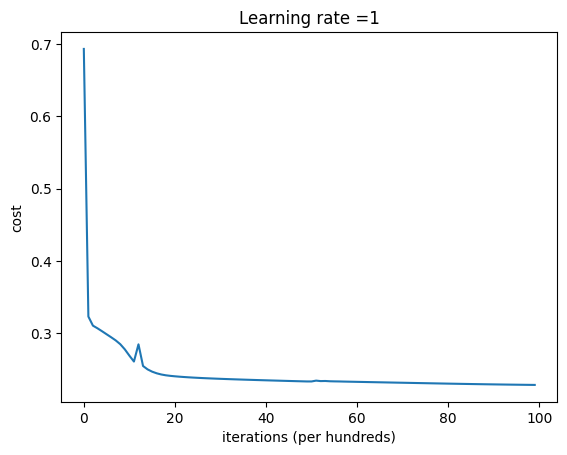

In [ ]:
parameters, costs = two_layer_model(train_set_x_normalized, train_set_y_normalized, layers_dims = (n_x, n_h, n_y), num_iterations = 10000, print_cost=False)
plot_costs(costs, learning_rate)

In [ ]:
predictions_train = predict(train_set_x_normalized, train_set_y_normalized, parameters)

Accuracy: 95.31367503187198


In [ ]:
predictions_test = predict(test_set_x_normalized, test_set_y_normalized, parameters)

Accuracy: 95.14269993657359


In [ ]:
#Reverse normalization
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reverse the normalization to get the original data
Y_prediction_test_real_scale = scaler.inverse_transform(predict(test_set_x_normalized, test_set_y_normalized, parameters))

Accuracy: 95.14269993657359


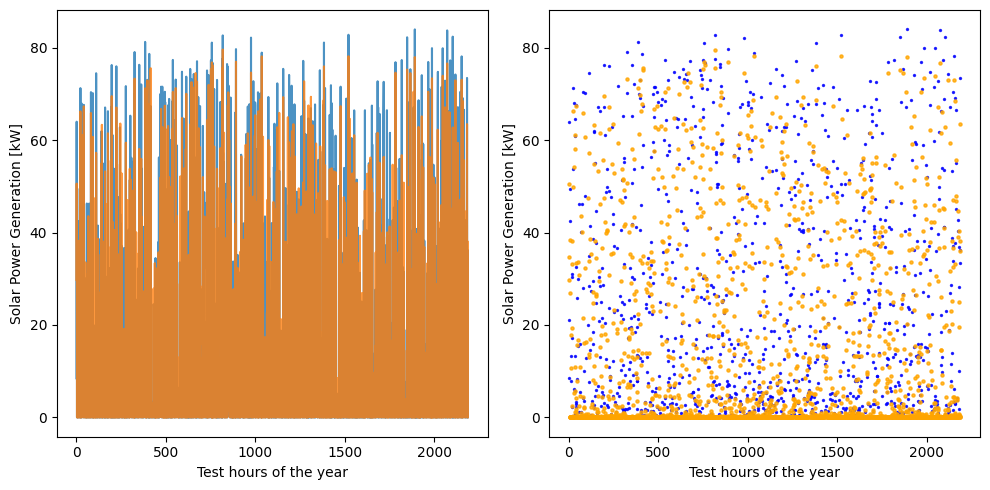

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))


# Plot actual values
ax2.scatter(x, y1, label='Observed', color='blue', s=2, alpha=0.8)

# Plot predicted values
ax2.scatter(x, y2, label='Predicted', color='orange', s=5, alpha=0.8)


# Plot actual values
ax1.plot(x, y1, label='Observed', alpha=0.8)

# Plot predicted values
ax1.plot(x, y2, label='Simulated', alpha=0.8)

ax1.set_xlabel('Test hours of the year')
ax1.set_ylabel('Solar Power Generation [kW]')
ax2.set_xlabel('Test hours of the year')
ax2.set_ylabel('Solar Power Generation [kW]')


fig.tight_layout()
plt.savefig("DNN with 2 layers and TANH.jpg")
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the two vectors

x = np.arange(0,2190, 1)
y1 = test_set_y_orig
y2 = Y_prediction_test_real_scale.T

# Set the figure size
plt.figure(figsize=(24, 12))

# Plot the vectors
plt.plot(x, y1, label='Observed')
plt.plot(x, y2, label='Simulated')

# Add a title and labels for the x and y axes
plt.title('Plot of Observed vs Simulated Vectors')
plt.xlabel('Hours of the year')
plt.ylabel('Power kW')

# Add a legend
plt.legend()

# Display the plot
plt.show()

L - layer Neural Network

In [ ]:
### CONSTANTS ###
layers_dims = [8, 100, 50, 25, 1] #  4-layer model
learning_rate = 0.85

In [ ]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.85, num_iterations = 2000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.

    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps

    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost

    # Parameters initialization.
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    parameters = initialize_parameters_deep(layers_dims)
    # YOUR CODE ENDS HERE

    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        #(≈ 1 line of code)
        # AL, caches = ...
        # YOUR CODE STARTS HERE
        AL, caches = L_model_forward(X, parameters)
        # YOUR CODE ENDS HERE

        # Compute cost.
        #(≈ 1 line of code)
        # cost = ...
        # YOUR CODE STARTS HERE
        cost = compute_cost(AL, Y)
        # YOUR CODE ENDS HERE

        # Backward propagation.
        #(≈ 1 line of code)
        # grads = ...
        # YOUR CODE STARTS HERE
        grads = L_model_backward(AL, Y, caches)
        # YOUR CODE ENDS HERE

        # Update parameters.
        #(≈ 1 line of code)
        # parameters = ...
        # YOUR CODE STARTS HERE
        parameters = update_parameters(parameters, grads, learning_rate)

        # YOUR CODE ENDS HERE

        # Print the cost every 100 iterations
        if print_cost and i % 100 == 0 or i == num_iterations - 1:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if i % 100 == 0 or i == num_iterations:
            costs.append(cost)

    return parameters, costs

In [ ]:
parameters, costs = L_layer_model(train_set_x_normalized, train_set_y_normalized, layers_dims, num_iterations = 1, print_cost = False)

print("Cost after first iteration: " + str(costs[0]))

Cost after iteration 0: 0.7929304399985443
Cost after first iteration: 0.7929304399985443


Cost after iteration 9999: 0.21962132607003224


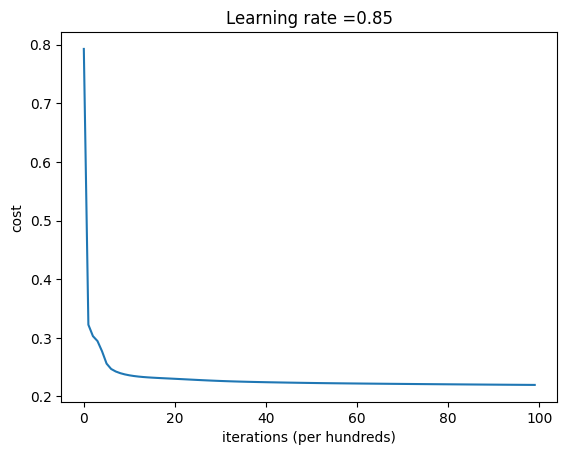

In [ ]:
parameters, costs = L_layer_model(train_set_x_normalized, train_set_y_normalized, layers_dims, num_iterations = 10000, print_cost = False)
plot_costs(costs, learning_rate)

In [ ]:
pred_train = predict(train_set_x_normalized, train_set_y_normalized, parameters)

Accuracy: 96.42783318358252


In [ ]:
pred_test = predict(test_set_x_normalized, test_set_y_normalized, parameters)

Accuracy: 95.93427668766506


In [ ]:
#Reverse normalization
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Reverse the normalization to get the original data
Y_prediction_test_real_scale = scaler.inverse_transform(predict(test_set_x_normalized, test_set_y_normalized, parameters))
plot_df = pd.DataFrame(test_set_y_orig)
plot_df["prediction"] = Y_prediction_test_real_scale.T

plot_df = plot_df.sort_index()

Accuracy: 95.93427668766506


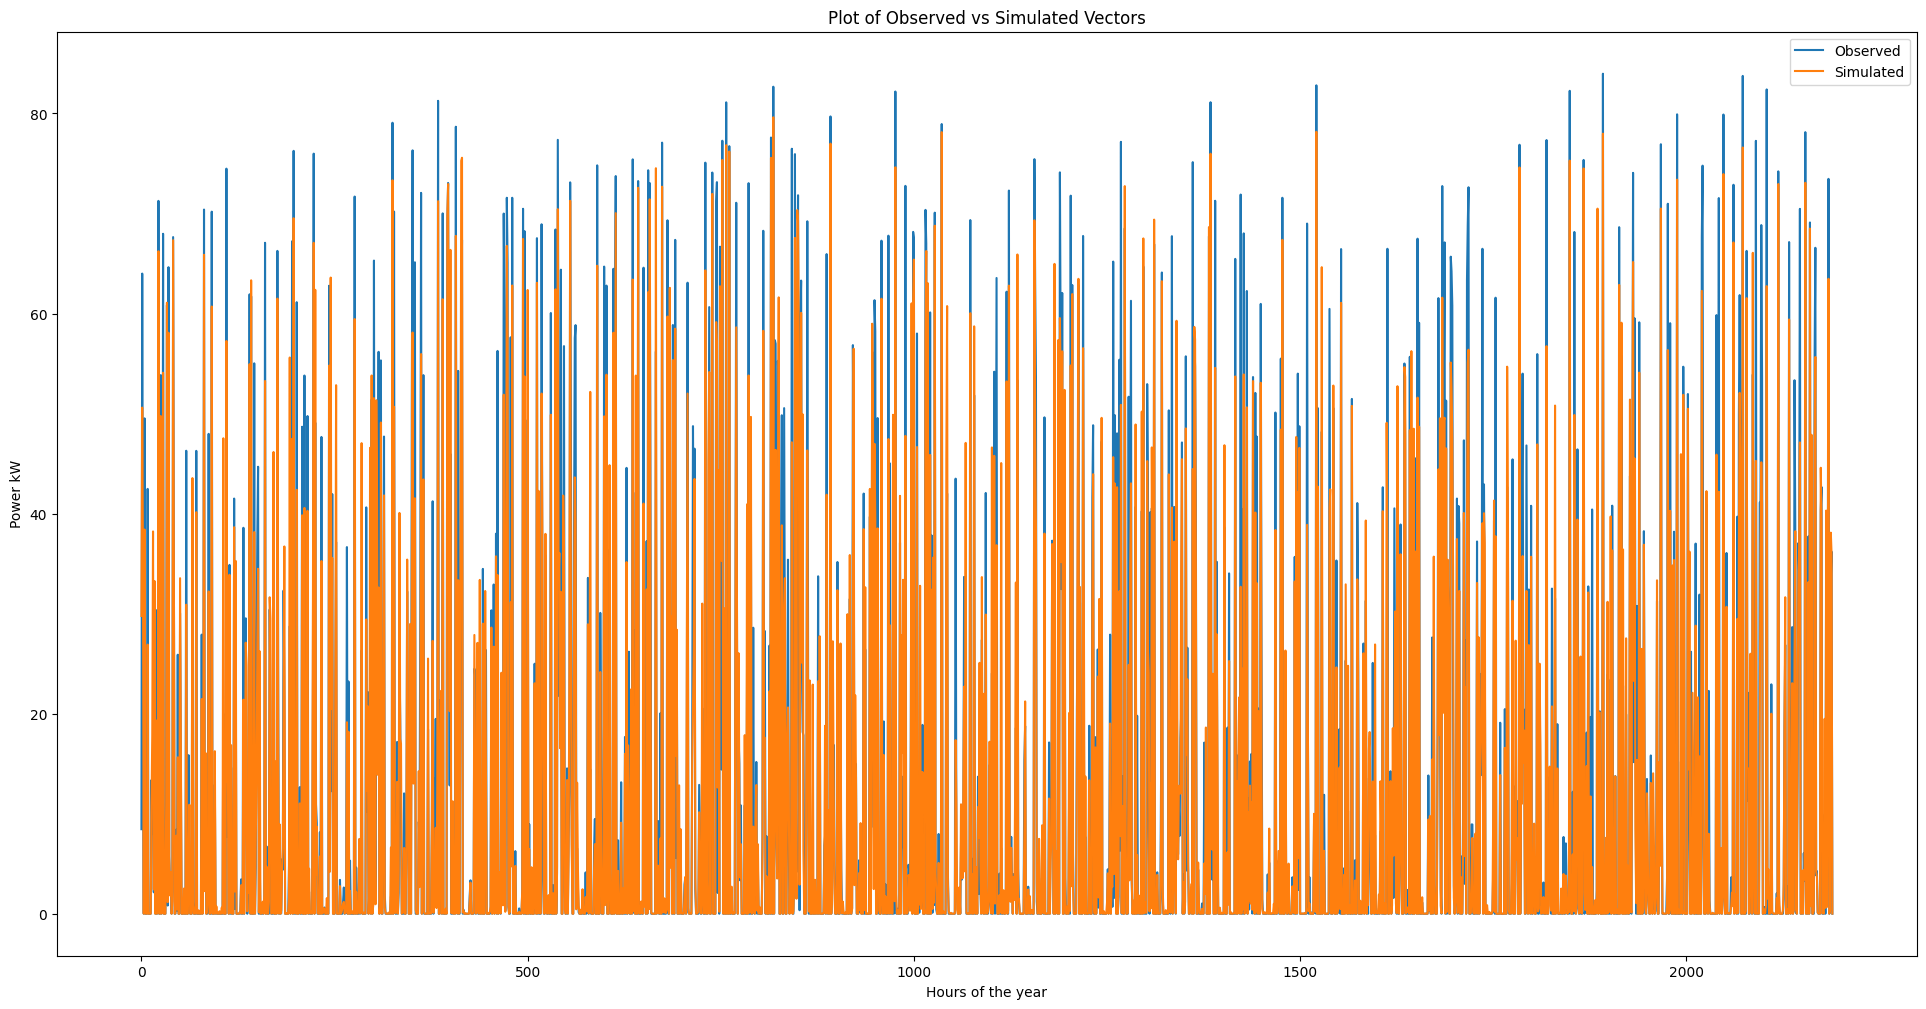

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the two vectors

x = np.arange(0,2190, 1)
y1 = test_set_y_orig
y2 = Y_prediction_test_real_scale.T

# Set the figure size
plt.figure(figsize=(24, 12))

# Plot the vectors
plt.plot(x, y1, label='Observed')
plt.plot(x, y2, label='Simulated')

# Add a title and labels for the x and y axes
plt.title('Plot of Observed vs Simulated Vectors')
plt.xlabel('Hours of the year')
plt.ylabel('Power kW')

# Add a legend
plt.legend()

# Display the plot
plt.show()

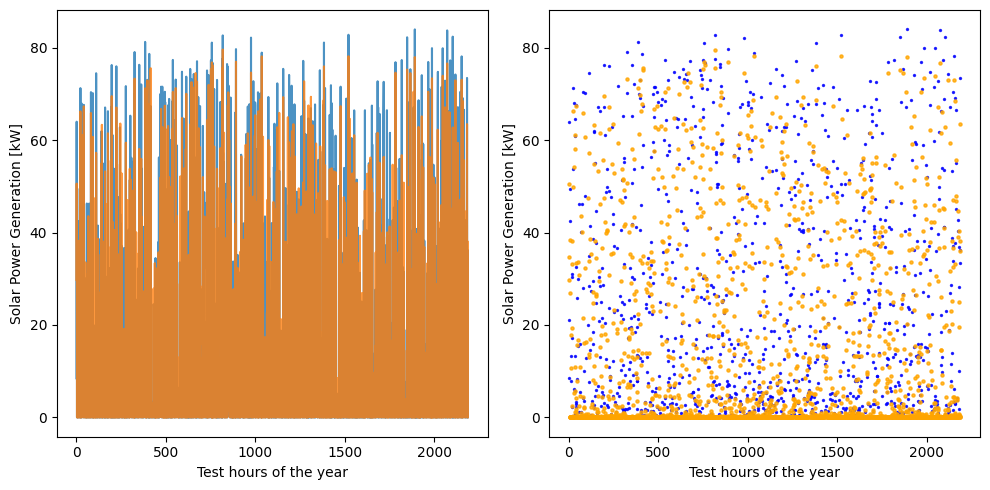

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,5))


# Plot actual values
ax2.scatter(x, y1, label='Observed', color='blue', s=2, alpha=0.8)

# Plot predicted values
ax2.scatter(x, y2, label='Predicted', color='orange', s=5, alpha=0.8)


# Plot actual values
ax1.plot(x, y1, label='Observed', alpha=0.8)

# Plot predicted values
ax1.plot(x, y2, label='Simulated', alpha=0.8)

ax1.set_xlabel('Test hours of the year')
ax1.set_ylabel('Solar Power Generation [kW]')
ax2.set_xlabel('Test hours of the year')
ax2.set_ylabel('Solar Power Generation [kW]')



fig.tight_layout()
plt.savefig("DNN with 4 layers and TANH.jpg")
plt.show()

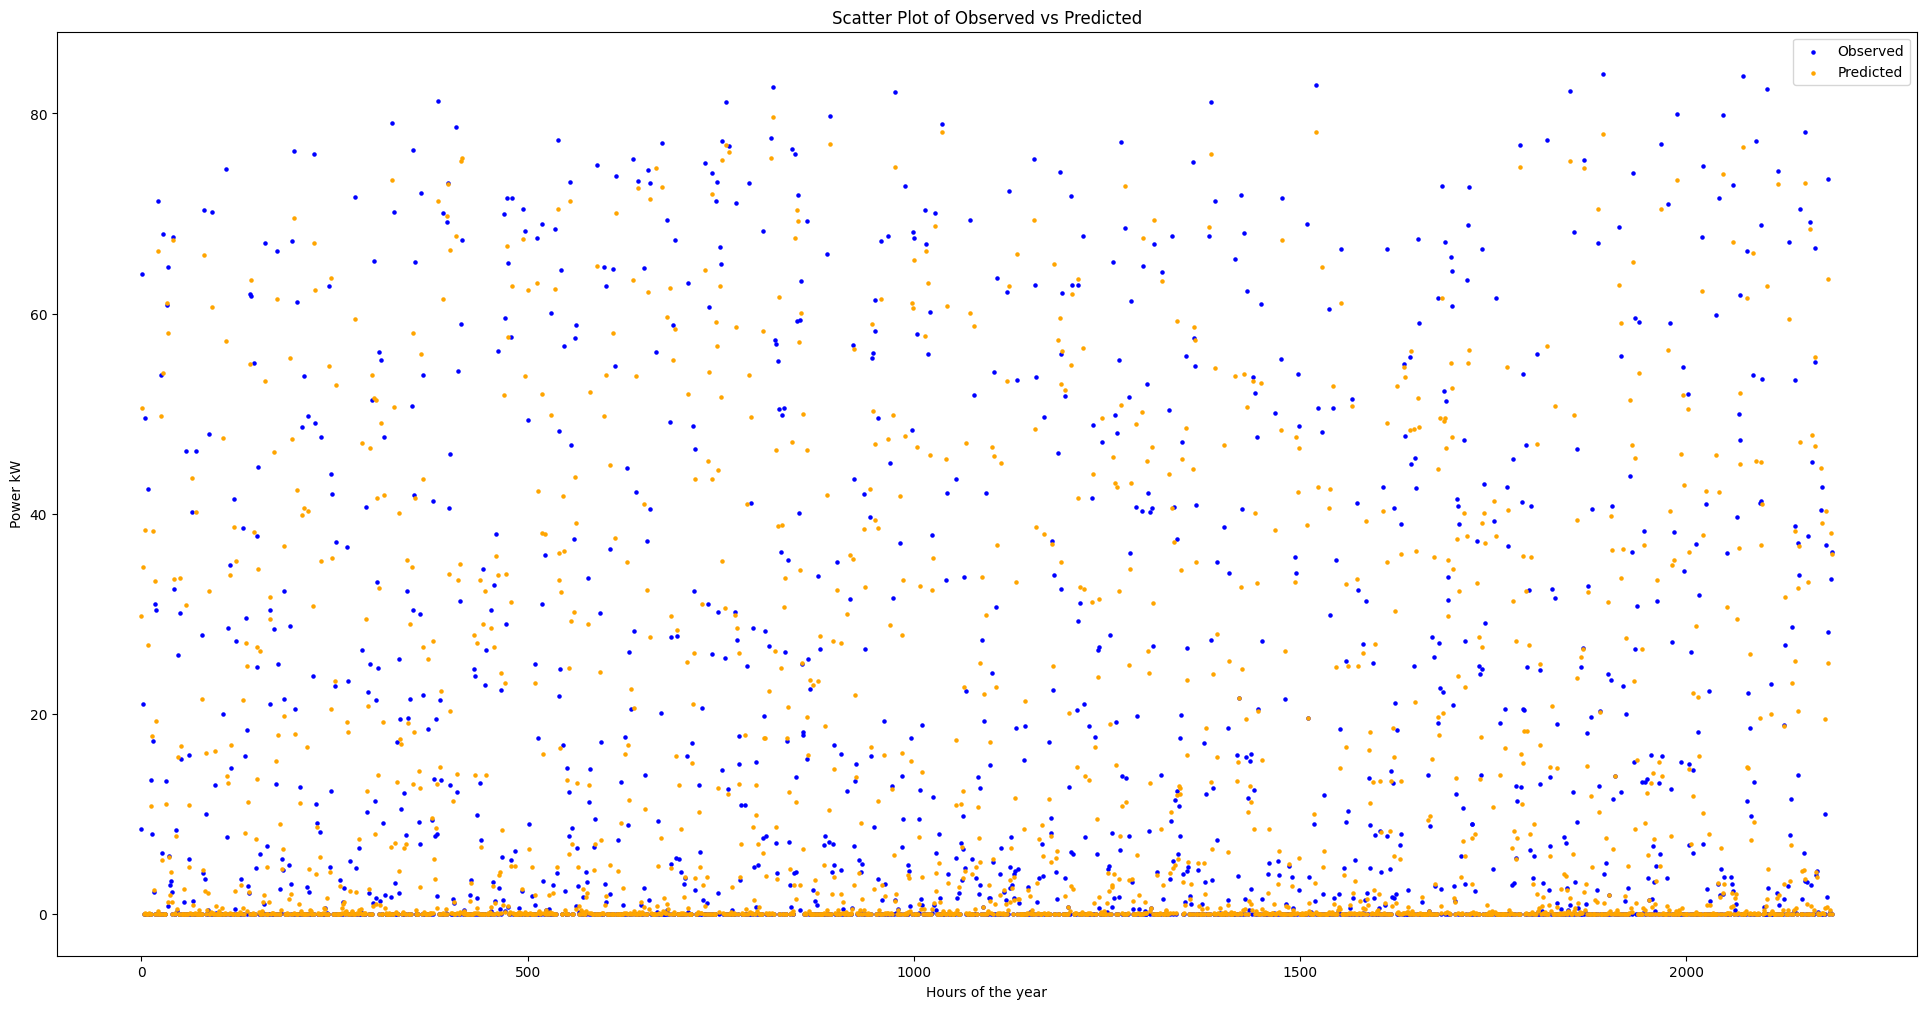

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the two vectors
x = np.arange(0, 2190, 1)
y1 = test_set_y_orig
y2 = Y_prediction_test_real_scale.T

# Set the figure size
plt.figure(figsize=(24, 12))

# Create a scatter plot for the observed values
plt.scatter(x, y1, label='Observed', color='blue', s=5)

# Create a scatter plot for the simulated values
plt.scatter(x, y2, label='Predicted', color='orange', s=5)

# Add a title and labels for the x and y axes
plt.title('Scatter Plot of Observed vs Predicted')
plt.xlabel('Hours of the year')
plt.ylabel('Power kW')

# Add a legend
plt.legend()

# Display the plot
plt.show()
